### Training of a modernised variant of Yann LeCun's LeNet-5 on the MNIST Dataset

Using Keras built-in into TensorFlow 1.8.0

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

### Preparation of Image Data

In [2]:
batch_size = 128 # Number of images processed at once
nb_classes = 10  # 10 Digits from 0 to 9

# Dimensionen of the input images (28x28 pixel)
img_rows, img_cols = 28, 28

# Load image data with labels, split into test and training set 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape images in 4D tensor (N images, 28 rows, 28 columns, 1 channel) 
# rescale pixels range from [0, 255] to [0, 1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "test samples")

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(y_test, nb_classes)
print("One-hot encoding: {}".format(Y_train[0, :]))



X_train shape:  (60000, 28, 28, 1)
60000 training samples
10000 test samples
One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Show bitmaps of the first 9 trainings images.

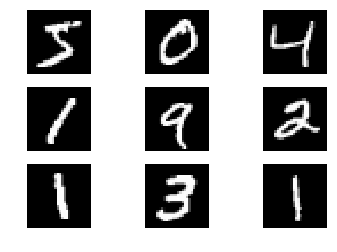

In [3]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')

### Define LeNet-5 Network Model

In [4]:
model = tf.keras.Sequential()

# Conv2D(number_filters, kernel_size, input_shape=(number_channels, img_col), padding, activation)
model.add(tf.keras.layers.Conv2D(6, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Train Model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
nb_epoch = 2 # Number of passes over all pictures of the training set

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test))

score =  model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 41us/step - loss: 0.3313 - acc: 0.8955 - val_loss: 0.0622 - val_acc: 0.9778
Epoch 2/2
60000/60000 [==============================] - 1s 23us/step - loss: 0.0927 - acc: 0.9742 - val_loss: 0.0413 - val_acc: 0.9879
Test score 0.04125149447929871
Test accuracy 0.9879


### Visualisierung of some test images and their inferred classification

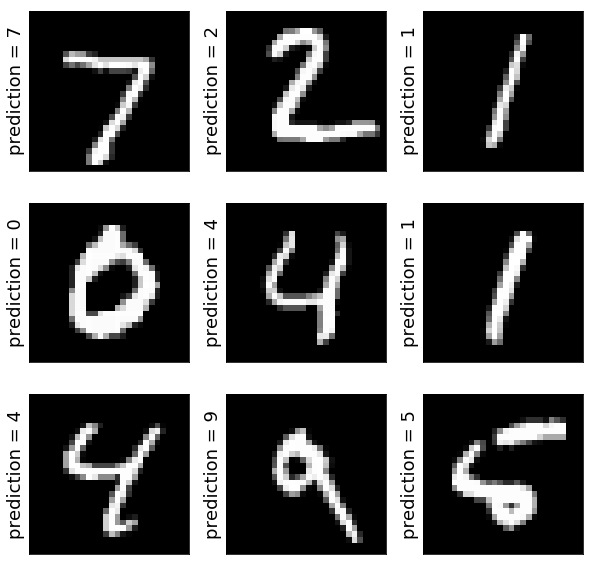

In [7]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = {}".format(res[i]), fontsize=18)